In [67]:
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import randomized_svd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('datos_limpios.csv')

In [69]:
#Para este modelo machine learnin vectorizamos la descripcion de las peliculas
#Notece que como "stop_words" pasamos las plabras comunes del ingles y el español que no aportan mucha informacion
vectorizer = TfidfVectorizer(stop_words=['english', 'spanish'], min_df=15, max_df=235)
X = vectorizer.fit_transform(data['description'].values.astype('U'))

In [ ]:
#Dividimos la dimencionalidad con el "randomized_svd" para que nuestro modelo no consuma demaciado espacio
U, Sigma, VT = randomized_svd(X, n_components=145)
X = U.dot(np.diag(Sigma))

c:\Users\Abel\anaconda3\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [71]:
# Función para obtener las 5 películas más similares
def get_recommendation(title: str):

    movie_idx = data[data['title'] == title].index[0]
    similarities = pairwise_distances(X, X[movie_idx].reshape(1, -1))
    similar_movie_indices = similarities.argsort(axis=0)[1:6].flatten()
    similar_movies = data.iloc[similar_movie_indices]['title'].tolist()

    indices = similarities.argsort()

    similarities = similarities.ravel()

    # Ordenar las distancias en orden ascendente
    indices = similarities.argsort()

    # Obtener los títulos de las 5 películas más similares
    titles = [data['title'][i] for i in indices[1:6]]

    # Crear un gráfico de barras horizontales
    fig, ax = plt.subplots()
    ax.barh(titles, similarities[indices][1:6])

    # Configurar las etiquetas de los ejes
    ax.set_xlabel('Distancia de similaridad')
    ax.set_ylabel('Título de la película')

    # Mostrar el gráfico
    plt.show()

    return similar_movies

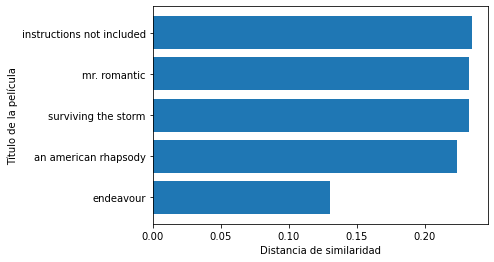

['endeavour',
 'an american rhapsody',
 'surviving the storm',
 'mr. romantic',
 'instructions not included']

In [75]:
get_recommendation('black widow')

In [73]:
joblib.dump(X, 'model.pkl')

['model.pkl']